In [45]:
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage import mean, median, variance
warnings.simplefilter('ignore', DeprecationWarning)

In [15]:
#load India data 
india = pd.read_csv('India.csv')
india.head()

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0


## Replacing NaN with zero

In [24]:
df=india.fillna(0)
df

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,06-03-2022,42967315.0,0.0,967279389.0,801141086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,07-03-2022,42971308.0,0.0,967460932.0,802358408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,08-03-2022,42975883.0,0.0,967725805.0,804228336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,09-03-2022,42980067.0,0.0,967946798.0,805886615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Removing Negative signs from all columns

In [65]:
df['school_closing']=df['school_closing'].abs()
df['workplace_closing']=df['workplace_closing'].abs()
df['cancel_events']=df['cancel_events'].abs()
df['gatherings_restrictions']=df['gatherings_restrictions'].abs()
df['transport_closing']=df['transport_closing'].abs()
df['stay_home_restrictions']=df['stay_home_restrictions'].abs()
df['internal_movement_restrictions']=df['internal_movement_restrictions'].abs()
df['facial_coverings']=df['facial_coverings'].abs()
df

,date,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
0,22-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,23-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,26-01-2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,06-03-2022,42967315.0,0.0,967279389.0,801141086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,07-03-2022,42971308.0,0.0,967460932.0,802358408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,08-03-2022,42975883.0,0.0,967725805.0,804228336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
777,09-03-2022,42980067.0,0.0,967946798.0,805886615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#Getting the basic details for each column
df.describe()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
count,7.790000e+02,779.0,7.790000e+02,7.790000e+02,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,1.680317e+07,0.0,2.392001e+08,1.284394e+08,2.403081,2.071887,1.783055,3.275995,1.184852,2.198973,1.591784,2.924262,1.915276,1.414634,3.412067
std,1.473802e+07,0.0,3.377076e+08,2.263555e+08,0.902320,1.008941,0.553484,1.239693,0.903706,0.641495,0.736653,0.928367,0.333263,0.528218,1.280026
min,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.882000e+06,0.0,0.000000e+00,0.000000e+00,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,4.000000
50%,1.091659e+07,0.0,4.138918e+06,0.000000e+00,3.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000
75%,3.267249e+07,0.0,4.720948e+08,1.378710e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000
max,4.298426e+07,0.0,9.679468e+08,8.058866e+08,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.000000,2.000000,4.000000


In [67]:
#getting the correlation between each column
df.corr()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,1.000000,NaN,0.889907,0.777054,-0.026759,-0.074135,0.018279,-0.023875,-0.006550,0.107584,0.292572,-0.467957,0.065355,-0.586673,0.116934
vaccines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_vaccinated,0.889907,NaN,1.000000,0.945088,-0.095892,-0.242769,-0.130331,-0.182910,-0.048692,-0.093161,0.290152,-0.529892,-0.018486,-0.589037,-0.077363
people_fully_vaccinated,0.777054,NaN,0.945088,1.000000,-0.043128,-0.242032,-0.162703,-0.151648,-0.049331,-0.139255,0.200744,-0.546573,-0.100670,-0.515592,-0.191414
school_closing,-0.026759,NaN,-0.095892,-0.043128,1.000000,0.671241,0.718367,0.802437,0.496459,0.527438,0.354221,0.568930,0.575345,-0.040978,0.419116
workplace_closing,-0.074135,NaN,-0.242769,-0.242032,0.671241,1.000000,0.755301,0.763067,0.729730,0.577619,0.489174,0.704298,0.522729,-0.109060,0.514473
cancel_events,0.018279,NaN,-0.130331,-0.162703,0.718367,0.755301,1.000000,0.758007,0.514563,0.639407,0.507586,0.745939,0.820042,0.092647,0.715973
gatherings_restrictions,-0.023875,NaN,-0.182910,-0.151648,0.802437,0.763067,0.758007,1.000000,0.516582,0.653329,0.368432,0.678232,0.573119,0.015416,0.633752
transport_closing,-0.006550,NaN,-0.048692,-0.049331,0.496459,0.729730,0.514563,0.516582,1.000000,0.191448,0.600050,0.563651,0.333744,-0.311559,0.278525
stay_home_restrictions,0.107584,NaN,-0.093161,-0.139255,0.527438,0.577619,0.639407,0.653329,0.191448,1.000000,0.280901,0.463467,0.638097,0.203819,0.535549


In [68]:
#checking covariance for each column
df.cov()

,confirmed,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,2.172093e+14,0.0,4.429195e+15,2.592277e+15,-3.558527e+05,-1.102378e+06,1.491102e+05,-4.362178e+05,-8.724255e+04,1.017137e+06,3.176392e+06,-6.402722e+06,3.210028e+05,-4.567181e+06,2.205974e+06
vaccines,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
people_vaccinated,4.429195e+15,0.0,1.140464e+17,7.224440e+16,-2.922017e+07,-8.271799e+07,-2.436099e+07,-7.657586e+07,-1.486033e+07,-2.018229e+07,7.218196e+07,-1.661300e+08,-2.080539e+06,-1.050743e+08,-3.344210e+07
people_fully_vaccinated,2.592277e+15,0.0,7.224440e+16,5.123679e+16,-8.808583e+06,-5.527518e+07,-2.038412e+07,-4.255413e+07,-1.009102e+07,-2.022071e+07,3.347317e+07,-1.148573e+08,-7.594115e+06,-6.164674e+07,-5.546057e+07
school_closing,-3.558527e+05,0.0,-2.922017e+07,-8.808583e+06,8.141807e-01,6.110893e-01,3.587669e-01,8.976062e-01,4.048282e-01,3.052988e-01,2.354495e-01,4.765833e-01,1.730120e-01,-1.953101e-02,4.840759e-01
workplace_closing,-1.102378e+06,0.0,-8.271799e+07,-5.527518e+07,6.110893e-01,1.017962e+00,4.217852e-01,9.544271e-01,6.653577e-01,3.738528e-01,3.635734e-01,6.596932e-01,1.757642e-01,-5.812277e-02,6.644271e-01
cancel_events,1.491102e+05,0.0,-2.436099e+07,-2.038412e+07,3.587669e-01,4.217852e-01,3.063449e-01,5.201069e-01,2.573780e-01,2.270263e-01,2.069557e-01,3.832908e-01,1.512618e-01,2.708634e-02,5.072484e-01
gatherings_restrictions,-4.362178e+05,0.0,-7.657586e+07,-4.255413e+07,8.976062e-01,9.544271e-01,5.201069e-01,1.536839e+00,5.787362e-01,5.195640e-01,3.364606e-01,7.805703e-01,2.367811e-01,1.009468e-02,1.005663e+00
transport_closing,-8.724255e+04,0.0,-1.486033e+07,-1.009102e+07,4.048282e-01,6.653577e-01,2.573780e-01,5.787362e-01,8.166854e-01,1.109870e-01,3.994641e-01,4.728873e-01,1.005145e-01,-1.487241e-01,3.221882e-01
stay_home_restrictions,1.017137e+06,0.0,-2.018229e+07,-2.022071e+07,3.052988e-01,3.738528e-01,2.270263e-01,5.195640e-01,1.109870e-01,4.115157e-01,1.327422e-01,2.760147e-01,1.364167e-01,6.906389e-02,4.397553e-01


In [69]:
#Checking skewness for each column
df.skew()

C:\Users\SANAS\AppData\Local\Temp\ipykernel_15256\441686791.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


confirmed                              0.320391
vaccines                               0.000000
people_vaccinated                      1.064069
people_fully_vaccinated                1.778569
school_closing                        -1.534825
workplace_closing                     -0.987558
cancel_events                         -2.461898
gatherings_restrictions               -1.557963
transport_closing                     -0.372388
stay_home_restrictions                -0.616274
internal_movement_restrictions        -1.450573
international_movement_restrictions   -0.844429
information_campaigns                 -4.232311
contact_tracing                       -0.022283
facial_coverings                      -2.024784
dtype: float64

In [60]:
print('The kurtosis of Confirmed cases: ', df["confirmed"].kurt())
print('The kurtosis of vaccines: ', df["vaccines"].kurt())
print('The kurtosis of people vaccinated: ', df["people_vaccinated"].kurt())
print('The kurtosis of people fully vaccinated: ', df["people_fully_vaccinated"].kurt())
print('The kurtosis of school closing: ', df["school_closing"].kurt())
print('The kurtosis of workplace closing: ', df["workplace_closing"].kurt())
print('The kurtosis of cancelled events: ', df["cancel_events"].kurt())
print('The kurtosis of gathering restrictions: ', df["gatherings_restrictions"].kurt())
print('The kurtosis of transport closing: ', df["transport_closing"].kurt())
print('The kurtosis of stay home restrictions: ', df["stay_home_restrictions"].kurt())
print('The kurtosis of internal movement restrictions: ', df["internal_movement_restrictions"].kurt())
print('The kurtosis of international movement restrictions: ', df["international_movement_restrictions"].kurt())
print('The kurtosis of information campaigns: ', df["information_campaigns"].kurt())
print('The kurtosis of contact tracing: ', df["contact_tracing"].kurt())
print('The kurtosis of facial coverings: ', df["facial_coverings"].kurt())

The kurtosis of Confirmed cases:  -1.4910367379349894
The kurtosis of vaccines:  0
The kurtosis of people vaccinated:  -0.5041101713581311
The kurtosis of people fully vaccinated:  1.8344058628986533
The kurtosis of school closing:  1.43711531425597
The kurtosis of workplace closing:  -0.08443967246652262
The kurtosis of cancelled events:  4.729668270041249
The kurtosis of gathering restrictions:  1.2566813870565259
The kurtosis of transport closing:  -1.674461320147625
The kurtosis of stay home restrictions:  1.1356559619849964
The kurtosis of internal movement restrictions:  0.408321270540855
The kurtosis of international movement restrictions:  0.5893916961896255
The kurtosis of information campaigns:  18.309141905895206
The kurtosis of contact tracing:  -1.2098991859885246
The kurtosis of facial coverings:  2.504994665055424


<AxesSubplot:>

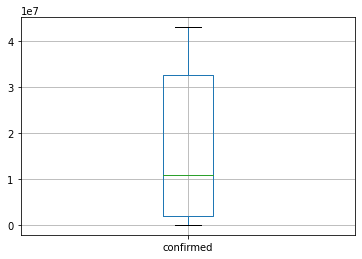

In [70]:
df.boxplot(column='confirmed')

In [71]:
df1= df.groupby(['confirmed']).sum()
df1.head()

,vaccines,people_vaccinated,people_fully_vaccinated,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,contact_tracing,facial_coverings
confirmed,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,4.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,5.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,28.0,28.0,56.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,4.0,0.0


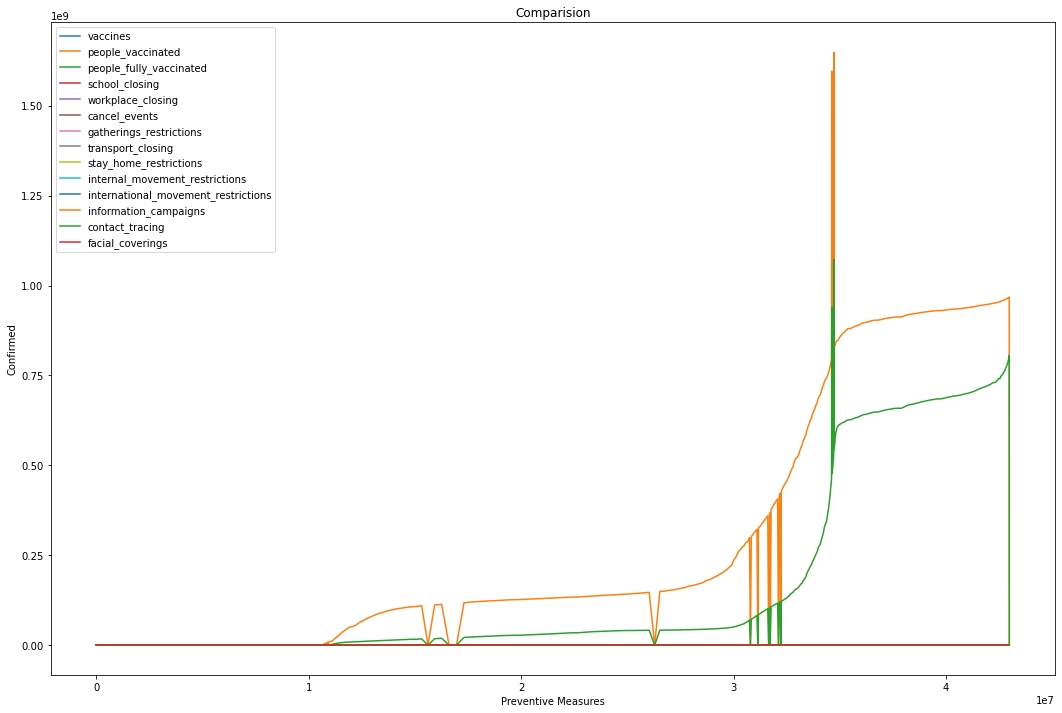

In [72]:
#line graph for better comparison

b = df1.plot(figsize=(18,12))
b.set_xlabel('Preventive Measures')
b.set_ylabel('Confirmed')
b.title.set_text('Comparision')
plt.show()

## To find out the relation between two variables, scatter plots have been being used for a long time. It is the most popular, basic, and easily understandable way of looking at a relationship between two variables.

### Relation Between the no.of cases and people vaccinated

<AxesSubplot:xlabel='confirmed', ylabel='people_vaccinated'>

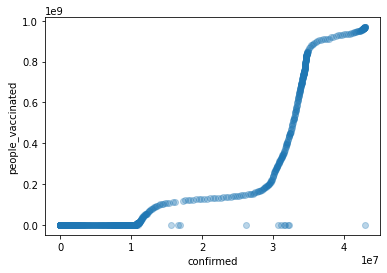

In [73]:
sns.regplot(x = "confirmed", y="people_vaccinated", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[1.         0.88990726]
 [0.88990726 1.        ]]


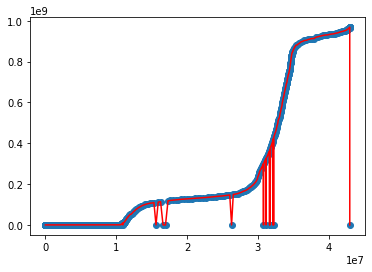

In [74]:
print(np.corrcoef(df['confirmed'],df['people_vaccinated']))
plt.scatter(df['confirmed'],df['people_vaccinated'])
plt.plot(df['confirmed'],df['people_vaccinated'],'r-')
plt.show()

### Relation Between the no.of cases and people fully vaccinated

<AxesSubplot:xlabel='confirmed', ylabel='people_fully_vaccinated'>

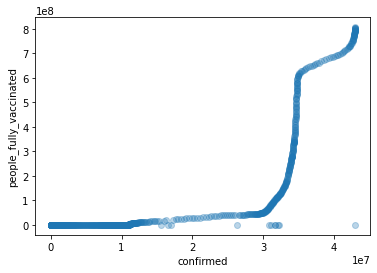

In [49]:
sns.regplot(x = "confirmed", y="people_fully_vaccinated", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[1.         0.77705411]
 [0.77705411 1.        ]]


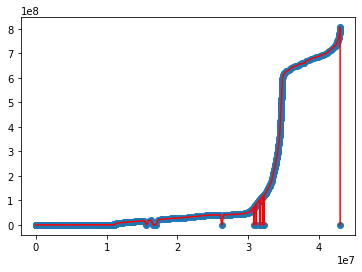

In [75]:
print(np.corrcoef(df['confirmed'],df['people_fully_vaccinated']))
plt.scatter(df['confirmed'],df['people_fully_vaccinated'])
plt.plot(df['confirmed'],df['people_fully_vaccinated'],'r-')
plt.show()

### Relation Between the no.of cases and school closing

<AxesSubplot:xlabel='confirmed', ylabel='school_closing'>

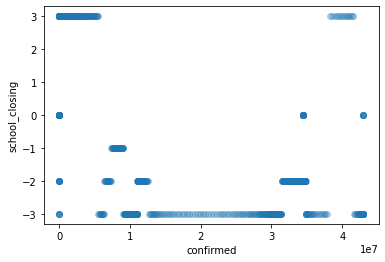

In [51]:
sns.regplot(x = "confirmed", y="school_closing", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.55639649]
 [-0.55639649  1.        ]]


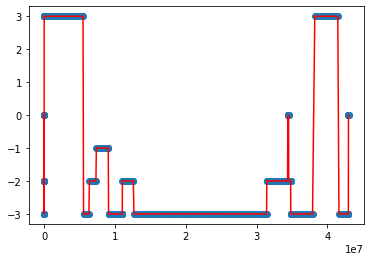

In [52]:
print(np.corrcoef(df['confirmed'],df['school_closing']))
plt.scatter(df['confirmed'],df['school_closing'])
plt.plot(df['confirmed'],df['school_closing'],'r-')
plt.show()

### Relation Between the no.of cases and workplace closing

<AxesSubplot:xlabel='confirmed', ylabel='workplace_closing'>

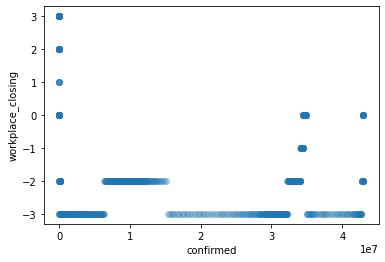

In [57]:
sns.regplot(x = "confirmed", y="workplace_closing", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.17684379]
 [-0.17684379  1.        ]]


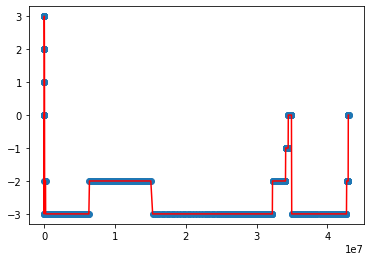

In [56]:
print(np.corrcoef(df['confirmed'],df['workplace_closing']))
plt.scatter(df['confirmed'],df['workplace_closing'])
plt.plot(df['confirmed'],df['workplace_closing'],'r-')
plt.show()

### Relation Between the no.of cases and cancel events

<AxesSubplot:xlabel='confirmed', ylabel='cancel_events'>

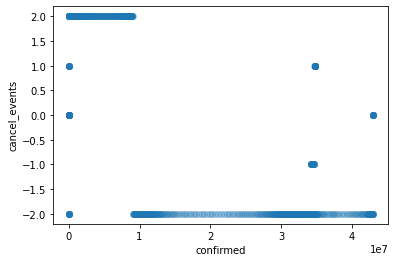

In [59]:
sns.regplot(x = "confirmed", y="cancel_events", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.64383569]
 [-0.64383569  1.        ]]


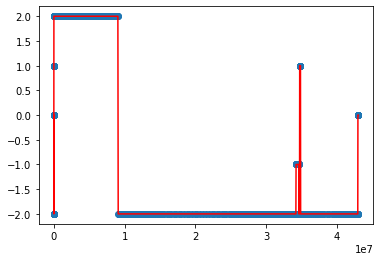

In [60]:
print(np.corrcoef(df['confirmed'],df['cancel_events']))
plt.scatter(df['confirmed'],df['cancel_events'])
plt.plot(df['confirmed'],df['cancel_events'],'r-')
plt.show()

### Relation Between the no.of cases and gathering restrictions

<AxesSubplot:xlabel='confirmed', ylabel='gatherings_restrictions'>

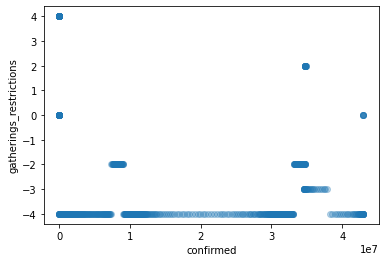

In [61]:
sns.regplot(x = "confirmed", y="gatherings_restrictions", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.16022724]
 [-0.16022724  1.        ]]


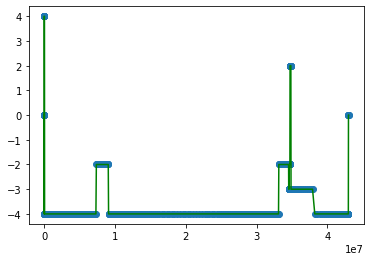

In [86]:
print(np.corrcoef(df['confirmed'],df['gatherings_restrictions']))
plt.scatter(df['confirmed'],df['gatherings_restrictions'])
plt.plot(df['confirmed'],df['gatherings_restrictions'],'g-')
plt.show()

### Relation Between the no.of cases and transport closing

<AxesSubplot:xlabel='confirmed', ylabel='transport_closing'>

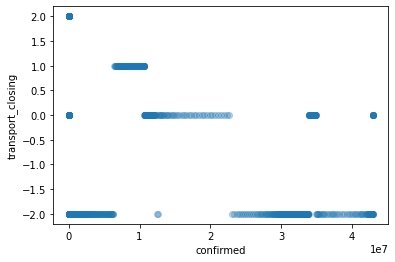

In [64]:
sns.regplot(x = "confirmed", y="transport_closing", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.29436252]
 [-0.29436252  1.        ]]


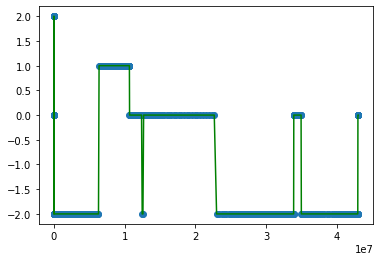

In [87]:
print(np.corrcoef(df['confirmed'],df['transport_closing']))
plt.scatter(df['confirmed'],df['transport_closing'])
plt.plot(df['confirmed'],df['transport_closing'],'g-')
plt.show()

### Relation Between the no.of cases and stay home restrictions

<AxesSubplot:xlabel='confirmed', ylabel='stay_home_restrictions'>

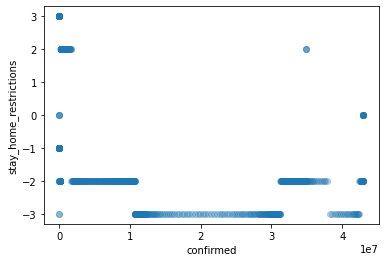

In [66]:
sns.regplot(x = "confirmed", y="stay_home_restrictions", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.44709133]
 [-0.44709133  1.        ]]


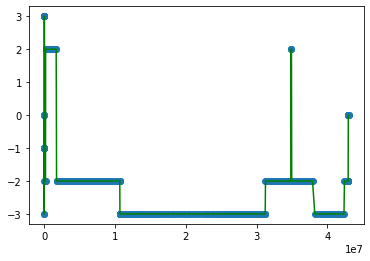

In [88]:
print(np.corrcoef(df['confirmed'],df['stay_home_restrictions']))
plt.scatter(df['confirmed'],df['stay_home_restrictions'])
plt.plot(df['confirmed'],df['stay_home_restrictions'],'g-')
plt.show()

### Relation Between the no.of cases and internal movement restrictions

<AxesSubplot:xlabel='confirmed', ylabel='internal_movement_restrictions'>

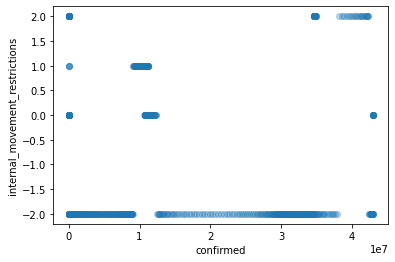

In [68]:
sns.regplot(x = "confirmed", y="internal_movement_restrictions", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.12298677]
 [-0.12298677  1.        ]]


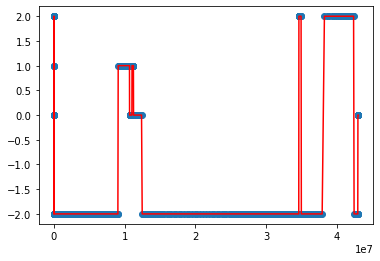

In [89]:
print(np.corrcoef(df['confirmed'],df['internal_movement_restrictions']))
plt.scatter(df['confirmed'],df['internal_movement_restrictions'])
plt.plot(df['confirmed'],df['internal_movement_restrictions'],'r-')
plt.show()

### Relation Between the no.of cases and international movement restrictions

<AxesSubplot:xlabel='confirmed', ylabel='international_movement_restrictions'>

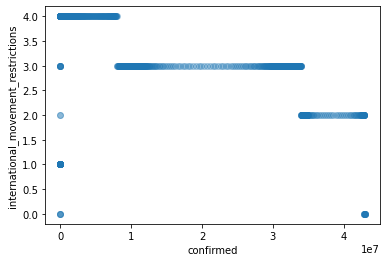

In [70]:
sns.regplot(x = "confirmed", y="international_movement_restrictions", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.46795671]
 [-0.46795671  1.        ]]


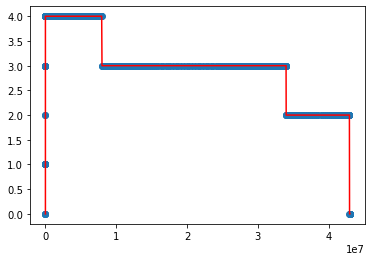

In [90]:
print(np.corrcoef(df['confirmed'],df['international_movement_restrictions']))
plt.scatter(df['confirmed'],df['international_movement_restrictions'])
plt.plot(df['confirmed'],df['international_movement_restrictions'],'r-')
plt.show()

### Relation Between the no.of cases and information campaigns

<AxesSubplot:xlabel='confirmed', ylabel='information_campaigns'>

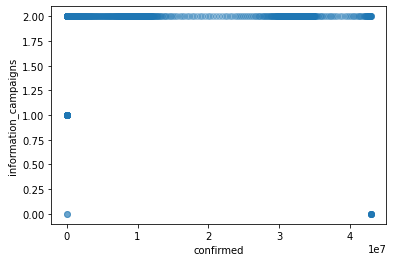

In [72]:
sns.regplot(x = "confirmed", y="information_campaigns", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[1.         0.06535547]
 [0.06535547 1.        ]]


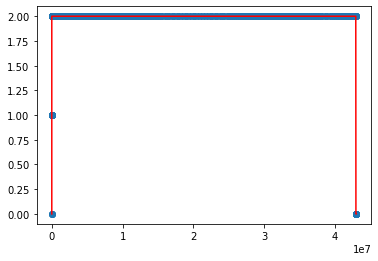

In [91]:
print(np.corrcoef(df['confirmed'],df['information_campaigns']))
plt.scatter(df['confirmed'],df['information_campaigns'])
plt.plot(df['confirmed'],df['information_campaigns'],'r-')
plt.show()

### Relation Between the no.of cases and contact_tracing

<AxesSubplot:xlabel='confirmed', ylabel='contact_tracing'>

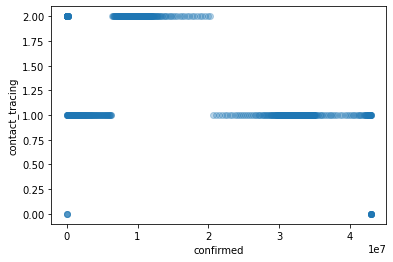

In [74]:
sns.regplot(x = "confirmed", y="contact_tracing", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[ 1.         -0.58667253]
 [-0.58667253  1.        ]]


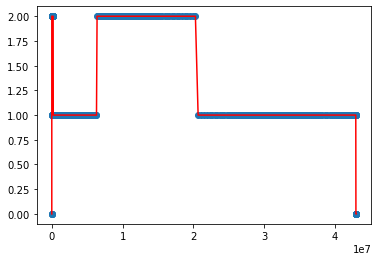

In [92]:
print(np.corrcoef(df['confirmed'],df['contact_tracing']))
plt.scatter(df['confirmed'],df['contact_tracing'])
plt.plot(df['confirmed'],df['contact_tracing'],'r-')
plt.show()

### Relation Between the no.of cases and facial coverings

<AxesSubplot:xlabel='confirmed', ylabel='facial_coverings'>

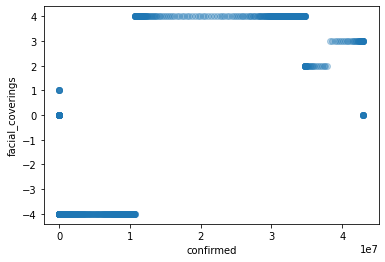

In [76]:
sns.regplot(x = "confirmed", y="facial_coverings", data=df, fit_reg = False, scatter_kws={"alpha": 0.3})

[[1.         0.72687235]
 [0.72687235 1.        ]]


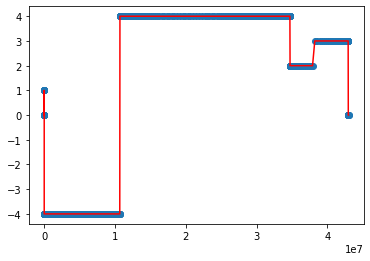

In [93]:
print(np.corrcoef(df['confirmed'],df['facial_coverings']))
plt.scatter(df['confirmed'],df['facial_coverings'])
plt.plot(df['confirmed'],df['facial_coverings'],'r-')
plt.show()

## Based on the data above we can say that the cor-realtion between no.of confirmed cases and people vaccinated is really high.That means out of all the other measures taken during the COVID period the most infuential was people getting vaccinated.The other measures didn't have much impact on the increasing number of cases.

